## Case Study on Probability for Data Science

### Problem Statement: 
Make a suitable machine learning algorithm to predict if the mushroom is 
edible or poisonous (e or p) using the given dataset.
(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)
Also, if some data pre-processing is necessary do that as well

##### Attribute (Features) Information on the Dataset
* cap-shape : bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
* cap-surface : fibrous=f, grooves=g, scaly=y, smooth=s
* cap-colour : brown=n, buff=b, cinnamon=c, Gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
* bruises : bruises=t, no=f
* odour : almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
* gill-attachment : attached=a, descending=d, free=f, notched=n
* gill-spacing : close=c, crowded=w, distant=d
* gill-size : broad=b, narrow=n
* gill-colour : black=k, brown=n, buff=b, chocolate=h, grey=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
* stalk-shape : enlarging=e, tapering=t
* stalk-root : bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
* stalk-surface-above-ring : fibrous=f, scaly=y, silky=k, smooth=s
* stalk-surface-below-ring : fibrous=f, scaly=y, silky=k, smooth=s
* stalk-colour-above-ring : brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
* stalk-colour-below-ring : brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
* veil-type : partial=p, universal=u
* veil-colour : brown=n, orange=o, white=w, yellow=y
* ring-number : none=n, one=o, two=t
* ring-type : cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
* spore-print-colour : black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
* population : abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
* habitat : grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

#### Importing Dependancies / Relevant Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

#### Loading Dataset

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv(r'mushrooms.csv')

In [5]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [6]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,o,c,l


#### Basic EDA

In [55]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [8]:
df.shape

(8124, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [9]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [11]:
df.duplicated().sum()

0

* The dataset has 22 features and one target (class label) columns.
* There are 8124 records and no features have null values.
* No duplicate records present in the dataset.
* All the features have values in object dtype

#### Distribution of Class Label

In [51]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

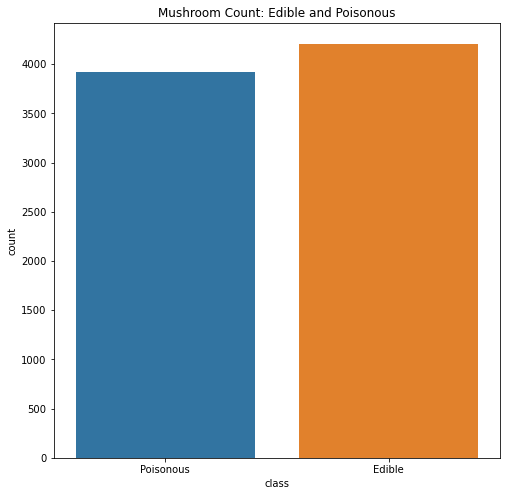

In [54]:
plt.figure(figsize=(8,8))
fig = sns.countplot(df['class'])
plt.title('Mushroom Count: Edible and Poisonous')
fig.set(xticklabels=['Poisonous','Edible'])
plt.show()

* Number of edible mushrooms are roughly equal to the number of poisonous mushrooms.
* The dataset is balanced.

In [63]:
feat_cols = df.drop('class', axis=1)

In [64]:
feat_cols.head(2)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g


In [74]:
def count_plotter(feature):
    plt.figure(figsize=(8,6))
    sns.countplot(feat_cols[feature])
    plt.title("{} count for Mushroom Samples.".format(feature))
    plt.show() 

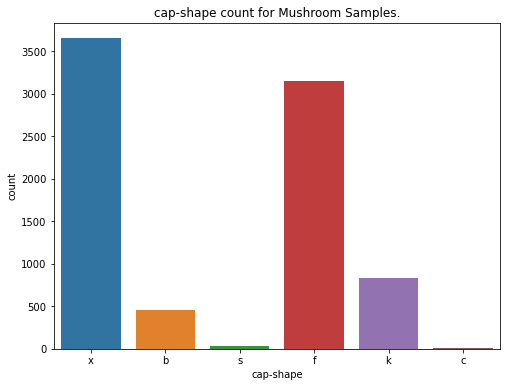

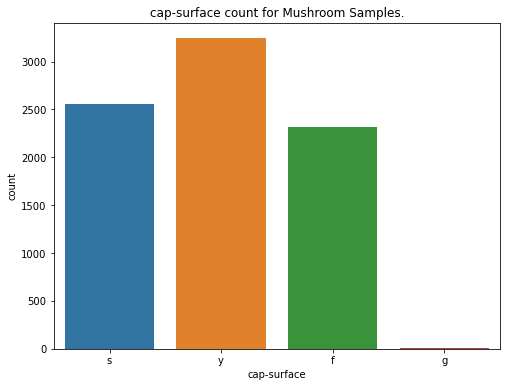

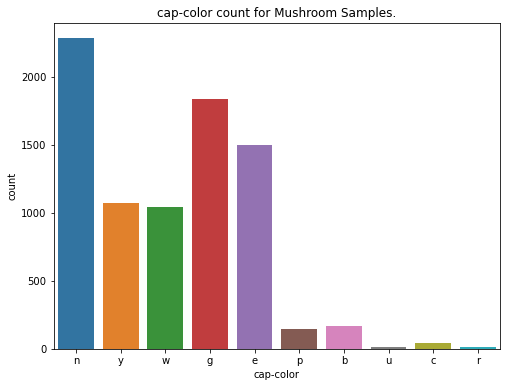

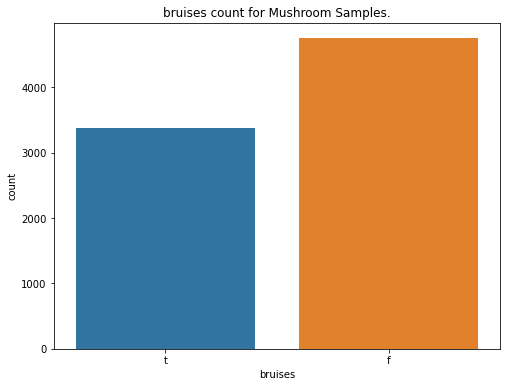

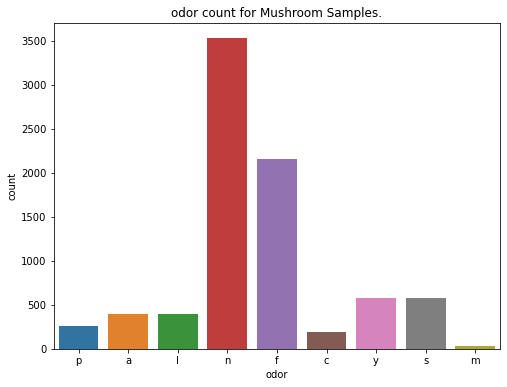

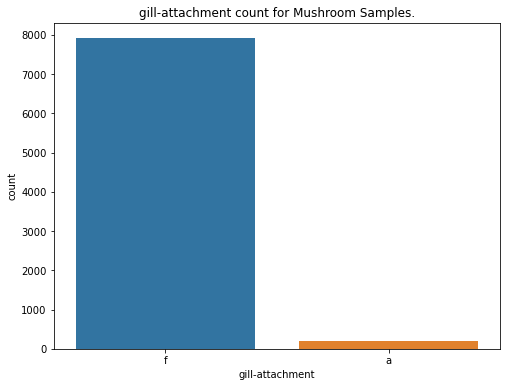

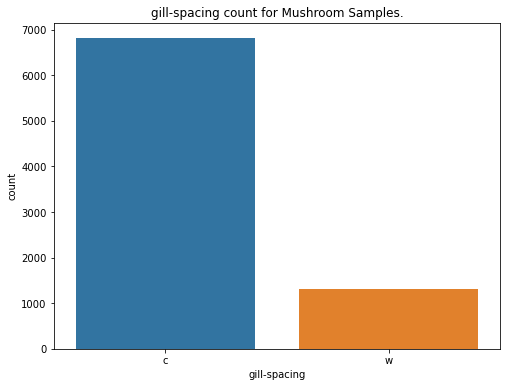

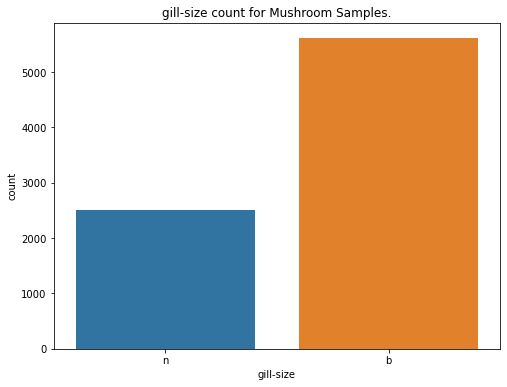

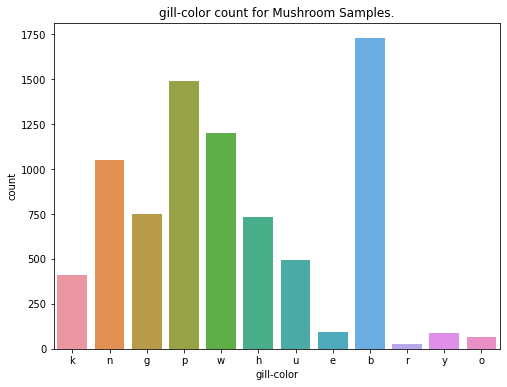

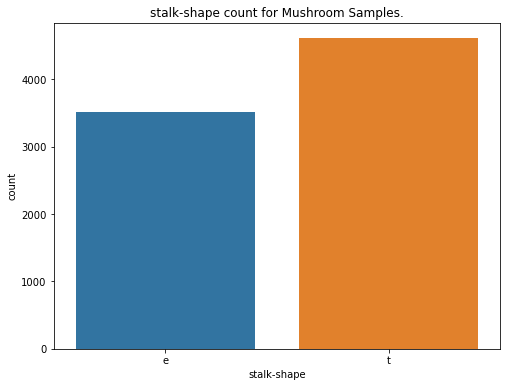

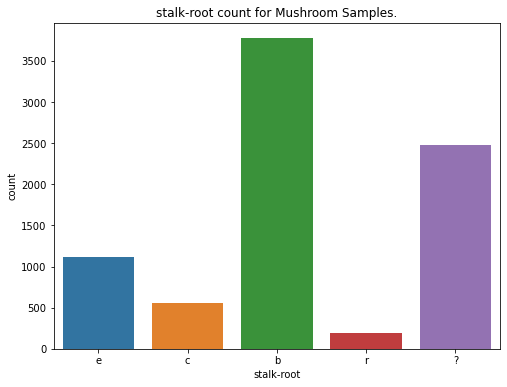

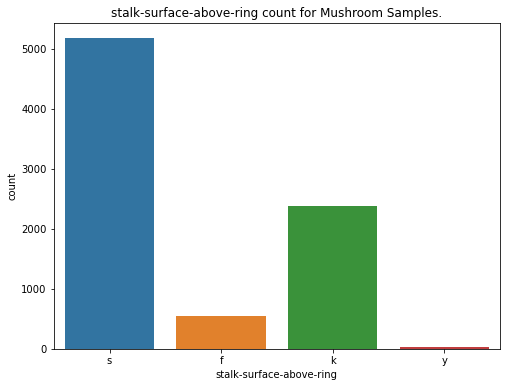

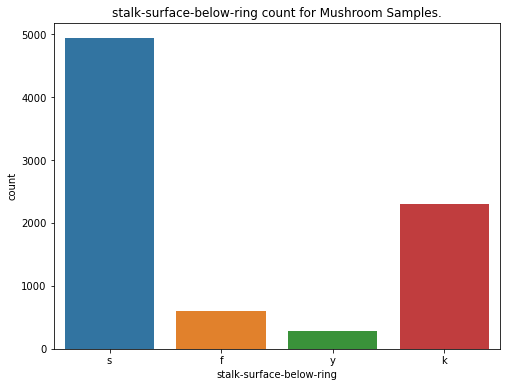

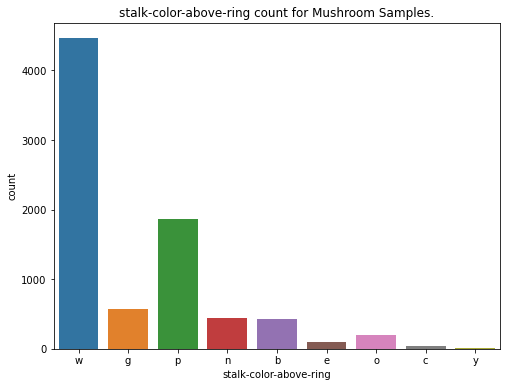

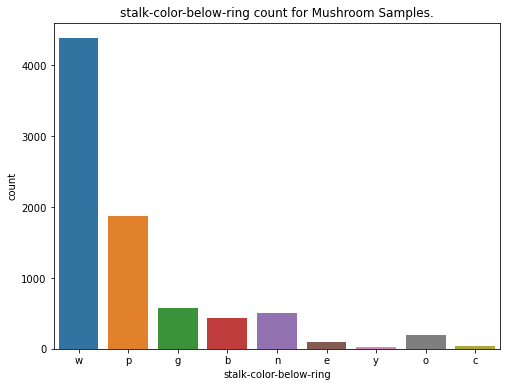

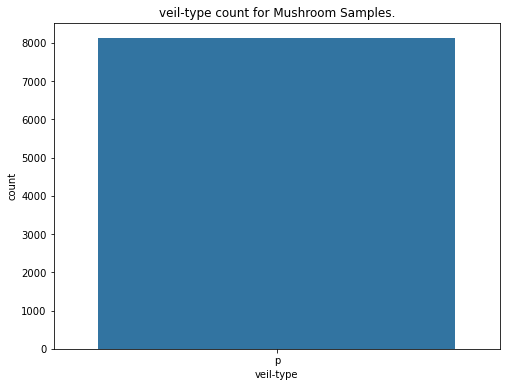

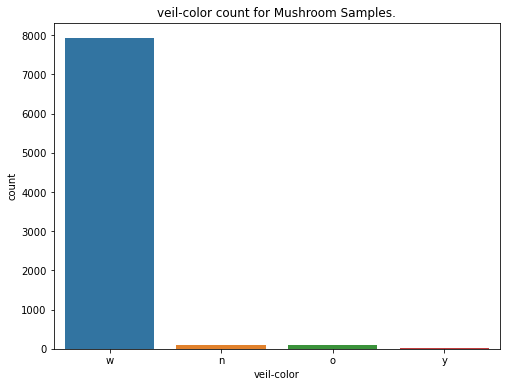

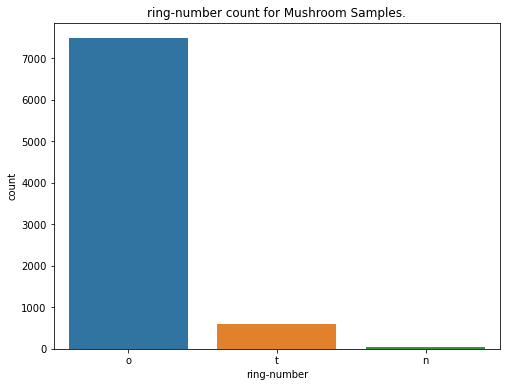

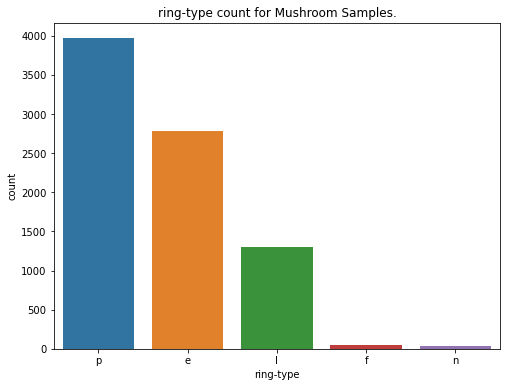

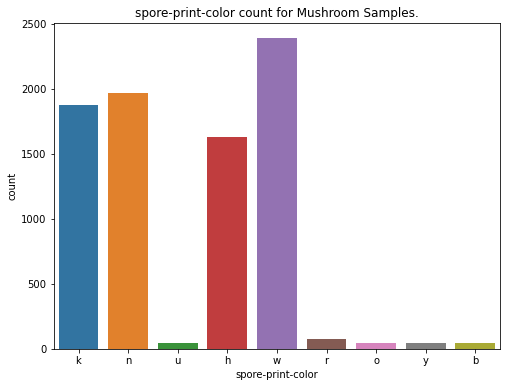

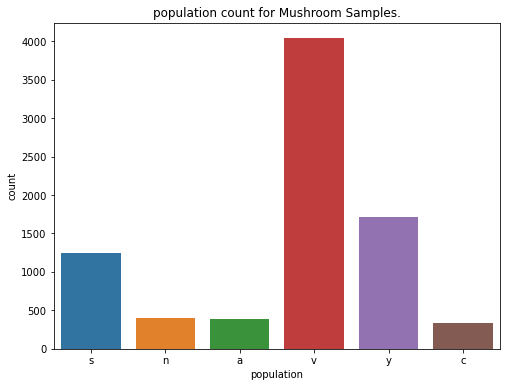

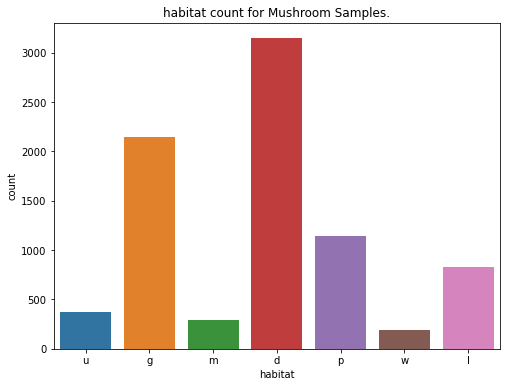

In [76]:
for i in feat_cols.columns:
    count_plotter(i)

* The count plots exactly shows the distribution of observations and categories under each features for the dataset.

#### Converting values into numerical
* Since all the values are in categorical values, we need to encode them.
* Firstly, it is required to check the unique values for each feature.

In [59]:
def unique_checker(data):
    """loops and prints unique values in each column"""
    for col in data.columns:
        print("Unique values in {} feature.".format(col))
        print(data[col].unique(),"\n")
        print("*"*40)

In [60]:
unique_checker(df) #scroll / toggle output to view all outputs

Unique values in class feature.
['p' 'e'] 

****************************************
Unique values in cap-shape feature.
['x' 'b' 's' 'f' 'k' 'c'] 

****************************************
Unique values in cap-surface feature.
['s' 'y' 'f' 'g'] 

****************************************
Unique values in cap-color feature.
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r'] 

****************************************
Unique values in bruises feature.
['t' 'f'] 

****************************************
Unique values in odor feature.
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm'] 

****************************************
Unique values in gill-attachment feature.
['f' 'a'] 

****************************************
Unique values in gill-spacing feature.
['c' 'w'] 

****************************************
Unique values in gill-size feature.
['n' 'b'] 

****************************************
Unique values in gill-color feature.
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o'] 

**************************

In [78]:
def count_checker(data):
    """count of each value under each feature in the data"""
    for col in data.columns:
        print("Count for each category of values in {} feature.".format(col))
        print(data[col].value_counts(),"\n")
        print("*"*40)

In [79]:
count_checker(df) #scroll / toggle output to view all outputs

Count for each category of values in class feature.
e    4208
p    3916
Name: class, dtype: int64 

****************************************
Count for each category of values in cap-shape feature.
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64 

****************************************
Count for each category of values in cap-surface feature.
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64 

****************************************
Count for each category of values in cap-color feature.
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64 

****************************************
Count for each category of values in bruises feature.
f    4748
t    3376
Name: bruises, dtype: int64 

****************************************
Count for each category of values in odor feature.
n    3528
f    2160
y     576
s     576
l     400
a     400
p     256
c 

* 'Veil-type' has only one unique value and is common for all the datapoints. Hence we can drop it.
* As seen from the above results, we see that the feature 'stalk-root' for the mushroom samples have a certain value '?'.
* '?' corresponds to the missing data according to the attribute information.
* There are about 2480 datapoints that have '?' value for stalk-root feature.
* Hence we need to handle this missing value using our missing value handling methods.
* We could assign the '?' values with the mode but that favors the mode value by far too much.
* Hence, we create a new category m which corresponds to missing values.

In [80]:
df['stalk-root'] = df['stalk-root'].replace(to_replace ="?",value = 'm')

In [81]:
df['stalk-root'].value_counts()

b    3776
m    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

### Label Encoding

In [82]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for col in df.columns:
    df[col] = label.fit_transform(df[col])

In [83]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,2,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,1,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,1,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,2,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,2,2,2,7,7,0,2,1,0,3,0,1


In [90]:
corr_mat = df.corr()
corr_mat

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,-0.102019,0.094766,-0.334593,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,-0.065641,-0.030417,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,0.247082,0.089090,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,-0.098696,-0.060837,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,-0.398393,0.460824,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,0.375189,0.118617,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,-0.173710,-0.088916,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,0.152667,-0.212359,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,0.526677,0.056310,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,-0.447710,0.224287,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


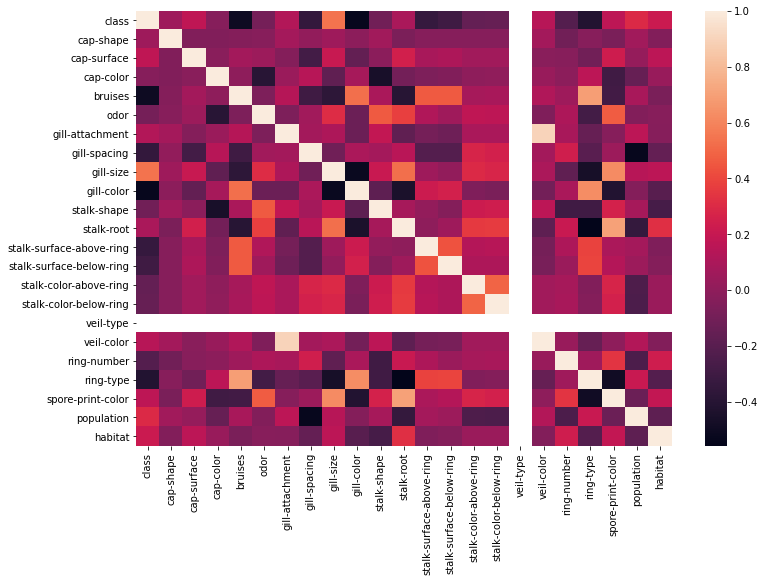

In [94]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

In [89]:
corr_mat['class'].sort_values(ascending=False).head(10) #values that have highest correlation with class label

class                1.000000
gill-size            0.540024
population           0.298686
habitat              0.217179
cap-surface          0.178446
spore-print-color    0.171961
veil-color           0.145142
gill-attachment      0.129200
stalk-root           0.094766
cap-shape            0.052951
Name: class, dtype: float64

* Class label has the highest correlation with gill-size for mushroom samples.
* Even this correlation is not much of a significance.

### Train-Test Splitting

In [96]:
X = df.drop('class',axis=1)
y = df['class']

In [99]:
X.head(1)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,2,2,2,7,7,0,2,1,4,2,3,5


In [105]:
#we drop veil type as well
X = X.drop('veil-type',axis=1)

In [106]:
X.shape

(8124, 21)

In [101]:
y.head(1)

0    1
Name: class, dtype: int32

In [102]:
y.shape

(8124,)

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [109]:
X_train.shape

(6093, 21)

In [110]:
X_test.shape

(2031, 21)

In [111]:
y_train.shape

(6093,)

In [112]:
y_test.shape

(2031,)

### Model Building 

#### 1. Logistic Regression

In [115]:
from sklearn.linear_model import LogisticRegression

#create the model instance
log_model = LogisticRegression()

In [116]:
#fit the model on the training data
log_model.fit(X_train, y_train)

#predictions
y_pred1 = log_model.predict(X_test)

In [117]:
#checking score, or accuracy of the model
log_model.score(X_test, y_test)

0.9581486952240276

In [118]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy for Logistic Regression is",round(accuracy_score(y_test,y_pred1),4))
print("Precision for Logistic Regression is",round(precision_score(y_test,y_pred1,average='macro'),4))
print("Recall for Logistic Regression is",round(recall_score(y_test,y_pred1,average='macro'),4))
print("F1-Score for Logistic Regression is",round(f1_score(y_test,y_pred1,average='macro'),4))

Accuracy for Logistic Regression is 0.9581
Precision for Logistic Regression is 0.9581
Recall for Logistic Regression is 0.9583
F1-Score for Logistic Regression is 0.9581


In [119]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1040
           1       0.95      0.97      0.96       991

    accuracy                           0.96      2031
   macro avg       0.96      0.96      0.96      2031
weighted avg       0.96      0.96      0.96      2031



Text(33.0, 0.5, 'Actual Labels')

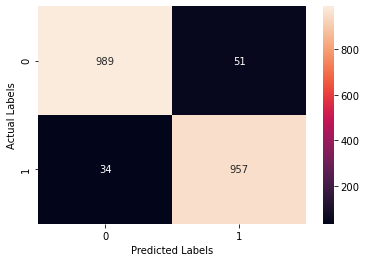

In [121]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True,fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

In [122]:
temp=[]
temp.append(['Logistic Regression',round(f1_score(y_test,y_pred1,average='macro'),5)])

#### 2. Decision Tree

In [123]:
from sklearn.tree import DecisionTreeClassifier
#create the model instance
dt = DecisionTreeClassifier()

In [126]:
#fit the model on the training data
dt.fit(X_train,y_train)

#predictions
y_pred2 = dt.predict(X_test)

In [127]:
#checking score, or accuracy of the model
dt.score(X_test, y_test)

1.0

In [129]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy for Decision Tree is",round(accuracy_score(y_test,y_pred2),4))
print("Precision for Decision Tree is",round(precision_score(y_test,y_pred2,average='macro'),4))
print("Recall for Decision Tree is",round(recall_score(y_test,y_pred2,average='macro'),4))
print("F1-Score for Decision Tree is",round(f1_score(y_test,y_pred2,average='macro'),4))

Accuracy for Decision Tree is 1.0
Precision for Decision Tree is 1.0
Recall for Decision Tree is 1.0
F1-Score for Decision Tree is 1.0


In [130]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



Text(33.0, 0.5, 'Actual Labels')

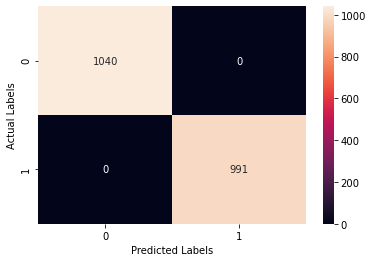

In [131]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True,fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

In [132]:
temp.append(['Decision Tree',round(f1_score(y_test,y_pred2,average='macro'),5)])

#### 3. K-Nearest Neighbours

In [135]:
from sklearn.neighbors import KNeighborsClassifier
k_val = np.arange(3,15)

perf_list = []
for k in k_val:
    knn = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    knn.fit(X_train,y_train)
    knn_pred = knn.predict(X_test)
    perf = accuracy_score(y_test,knn_pred)
    perf_list.append(perf)

Text(0, 0.5, 'Accuracy measure')

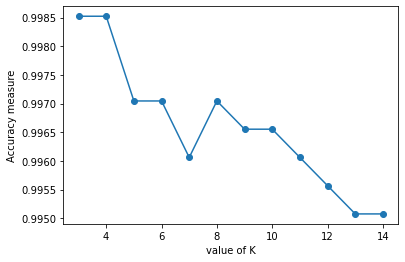

In [136]:
#plotting the k_vals
plt.plot(k_val,perf_list,'o-')
plt.xlabel('value of K')
plt.ylabel("Accuracy measure")

In [138]:
#we see that the optimal lies between 3 to 9.
#as an ideal number, we pick 5
#ideal means odd and minimum with max score

In [140]:
#instantiating the model
knn_model = KNeighborsClassifier(n_neighbors=5,metric='minkowski')


In [142]:
#fitting the values 
knn_model.fit(X_train,y_train)

#predictions 
y_pred3 = knn_model.predict(X_test)

In [143]:
#checking score, or accuracy of the model
knn_model.score(X_test, y_test)

0.9970457902511078

In [144]:
#from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy for KNN is",round(accuracy_score(y_test,y_pred3),4))
print("Precision for KNN is",round(precision_score(y_test,y_pred3,average='macro'),4))
print("Recall for KNN is",round(recall_score(y_test,y_pred3,average='macro'),4))
print("F1-Score for KNN is",round(f1_score(y_test,y_pred3,average='macro'),4))

Accuracy for KNN is 0.997
Precision for KNN is 0.997
Recall for KNN is 0.9971
F1-Score for KNN is 0.997


In [146]:
#from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1040
           1       0.99      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



Text(33.0, 0.5, 'Actual Labels')

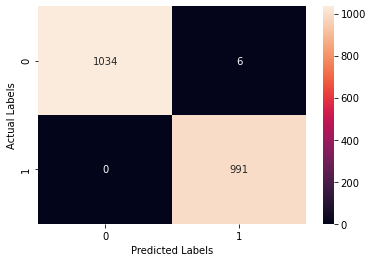

In [147]:
#from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred3),annot=True,fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

In [148]:
temp.append(['K-Nearest Neighbours',round(f1_score(y_test,y_pred3,average='macro'),5)])

#### 4. Linear SVM

In [145]:
from sklearn.svm import SVC

#instantiating and fitting linear svm
lin_sv = SVC(kernel='linear')

lin_sv.fit(X_train,y_train)

SVC(kernel='linear')

In [149]:
y_pred4 = lin_sv.predict(X_test)

In [150]:
#checking score, or accuracy of the model
lin_sv.score(X_test, y_test)

0.965534219596258

In [151]:
#from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy for Linear SVM is",round(accuracy_score(y_test,y_pred4),4))
print("Precision for Linear SVM is",round(precision_score(y_test,y_pred4,average='macro'),4))
print("Recall for Linear SVM is",round(recall_score(y_test,y_pred4,average='macro'),4))
print("F1-Score for Linear SVM is",round(f1_score(y_test,y_pred4,average='macro'),4))

Accuracy for Linear SVM is 0.9655
Precision for Linear SVM is 0.9655
Recall for Linear SVM is 0.9658
F1-Score for Linear SVM is 0.9655


In [152]:
#from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1040
           1       0.95      0.98      0.97       991

    accuracy                           0.97      2031
   macro avg       0.97      0.97      0.97      2031
weighted avg       0.97      0.97      0.97      2031



Text(33.0, 0.5, 'Actual Labels')

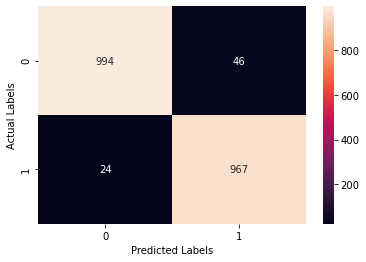

In [153]:
#from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred4),annot=True,fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

In [154]:
temp.append(['Linear SVM',round(f1_score(y_test,y_pred4,average='macro'),5)])

#### 5. Gradient Boosting

In [155]:
from sklearn.ensemble import GradientBoostingClassifier

#instantiating and fitting
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [156]:
y_pred5 = gb.predict(X_test)

In [157]:
#from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy is",round(accuracy_score(y_test,y_pred5),4))
print("Precision is",round(precision_score(y_test,y_pred5,average='macro'),4))
print("Recall is",round(recall_score(y_test,y_pred5,average='macro'),4))
print("F1-Score is",round(f1_score(y_test,y_pred5,average='macro'),4))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
F1-Score is 1.0


In [158]:
#from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



Text(33.0, 0.5, 'Actual Labels')

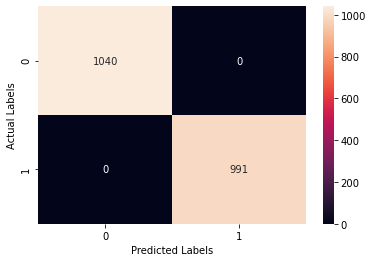

In [160]:
#from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred5),annot=True,fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

In [159]:
temp.append(['Gradient Boosting',round(f1_score(y_test,y_pred5,average='macro'),5)])

#### 6. Extreme Gradient Boosting

In [161]:
from xgboost import XGBClassifier

#instantiating and fitting
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

[22:56:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [162]:
y_pred6 = xgb.predict(X_test)

In [163]:
#from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy is",round(accuracy_score(y_test,y_pred6),4))
print("Precision is",round(precision_score(y_test,y_pred6,average='macro'),4))
print("Recall is",round(recall_score(y_test,y_pred6,average='macro'),4))
print("F1-Score is",round(f1_score(y_test,y_pred6,average='macro'),4))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
F1-Score is 1.0


In [164]:
#from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



Text(33.0, 0.5, 'Actual Labels')

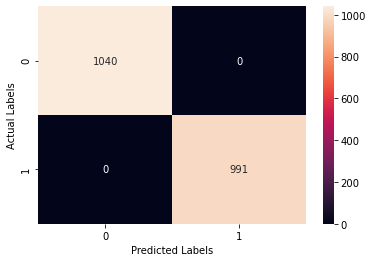

In [165]:
#from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred6),annot=True,fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

In [167]:
temp.append(['XG Boosting',round(f1_score(y_test,y_pred6,average='macro'),5)])

### 7. Naive Bayes Classifiers

#### 7.1 Bernoulli NB Classifier

In [172]:
from sklearn.naive_bayes import BernoulliNB

#instantiating the model
bern_NB = BernoulliNB()

In [173]:
#fitting 
bern_NB.fit(X_train, y_train)

#predictions
y_pred7 = bern_NB.predict(X_test) 

In [174]:
#checking score, or accuracy of the model
bern_NB.score(X_test, y_test)

0.8709995076317085

In [210]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy for Bernoulli NB Classifier is",round(accuracy_score(y_test,y_pred7),4))
print("Precision for Bernoulli NB Classifier is",round(precision_score(y_test,y_pred7,average='macro'),4))
print("Recall for Bernoulli NB Classifier is",round(recall_score(y_test,y_pred7,average='macro'),4))
print("F1-Score for Bernoulli NB Classifier is",round(f1_score(y_test,y_pred7,average='macro'),4))
print("="*50)
print('Ratio of misclassified samples: %d out of %d' % ((y_test != y_pred7).sum(), y_test.shape[0]))

Accuracy for Bernoulli NB Classifier is 0.871
Precision for Bernoulli NB Classifier is 0.8811
Recall for Bernoulli NB Classifier is 0.869
F1-Score for Bernoulli NB Classifier is 0.8696
Ratio of misclassified samples: 262 out of 2031


In [177]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1040
           1       0.94      0.79      0.86       991

    accuracy                           0.87      2031
   macro avg       0.88      0.87      0.87      2031
weighted avg       0.88      0.87      0.87      2031



Text(33.0, 0.5, 'Actual Labels')

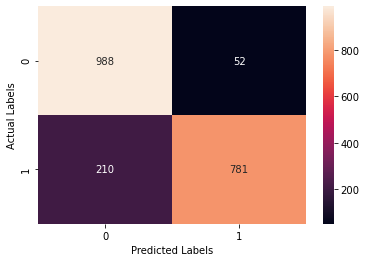

In [178]:
#from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred7),annot=True,fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

In [186]:
temp.append(['Bernoulli Naive Bayes',round(f1_score(y_test,y_pred7,average='macro'),5)])

#### 7.2 Gaussian NB Classifier

In [180]:
from sklearn.naive_bayes import GaussianNB

#instantiating the model
gauss_NB = GaussianNB()

In [181]:
#fitting
gauss_NB.fit(X_train, y_train)

#predictions
y_pred8 = gauss_NB.predict(X_test) 

In [182]:
#checking score, or accuracy of the model
gauss_NB.score(X_test, y_test)

0.92959133431807

In [214]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy for Gaussian NB Classifier is",round(accuracy_score(y_test,y_pred8),4))
print("Precision for Gaussian NB Classifier is",round(precision_score(y_test,y_pred8,average='macro'),4))
print("Recall for Gaussian NB Classifier is",round(recall_score(y_test,y_pred8,average='macro'),4))
print("F1-Score for Gaussian NB Classifier is",round(f1_score(y_test,y_pred8,average='macro'),4))
print("="*50)
print('Ratio of misclassified samples: %d out of %d' % ((y_test != y_pred8).sum(), y_test.shape[0]))

Accuracy for Gaussian NB Classifier is 0.9296
Precision for Gaussian NB Classifier is 0.9295
Recall for Gaussian NB Classifier is 0.9296
F1-Score for Gaussian NB Classifier is 0.9296
Ratio of misclassified samples: 143 out of 2031


In [184]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred8))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1040
           1       0.93      0.93      0.93       991

    accuracy                           0.93      2031
   macro avg       0.93      0.93      0.93      2031
weighted avg       0.93      0.93      0.93      2031



Text(33.0, 0.5, 'Actual Labels')

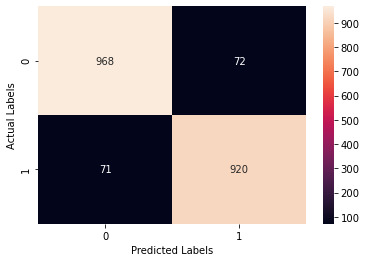

In [185]:
#from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred8),annot=True,fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

In [187]:
temp.append(['Gaussian Naive Bayes',round(f1_score(y_test,y_pred8,average='macro'),5)])

#### 7.3 Multinomial Naive Bayes

In [188]:
from sklearn.naive_bayes import MultinomialNB

#instantianting the model
multi_NB = MultinomialNB() 

In [189]:
#fitting
multi_NB.fit(X_train, y_train)

#predictions
y_pred9 = multi_NB.predict(X_test)

In [190]:
#checking score, or accuracy of the model
multi_NB.score(X_test, y_test)

0.8030526834071886

In [213]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy for Multinomial NB Classifier is",round(accuracy_score(y_test,y_pred9),4))
print("Precision for Multinomial NB Classifier is",round(precision_score(y_test,y_pred9,average='macro'),4))
print("Recall for Multinomial NB Classifier is",round(recall_score(y_test,y_pred9,average='macro'),4))
print("F1-Score for Multinomial NB Classifier is",round(f1_score(y_test,y_pred9,average='macro'),4))
print("="*50)
print('Ratio of misclassified samples: %d out of %d' % ((y_test != y_pred9).sum(), y_test.shape[0]))

Accuracy for Multinomial NB Classifier is 0.8031
Precision for Multinomial NB Classifier is 0.8221
Recall for Multinomial NB Classifier is 0.8001
F1-Score for Multinomial NB Classifier is 0.7989
Ratio of misclassified samples: 400 out of 2031


In [192]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred9))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83      1040
           1       0.89      0.68      0.77       991

    accuracy                           0.80      2031
   macro avg       0.82      0.80      0.80      2031
weighted avg       0.82      0.80      0.80      2031



Text(33.0, 0.5, 'Actual Labels')

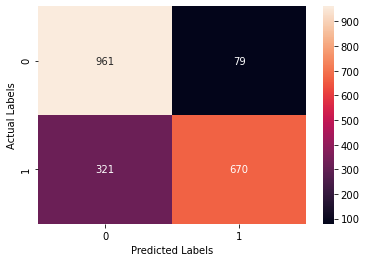

In [193]:
#from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred9),annot=True,fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

In [194]:
temp.append(['Multinomial Naive Bayes',round(f1_score(y_test,y_pred9,average='macro'),5)])

#### 8. Random Forest Classifier

In [195]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [197]:
y_pred10 = rf.predict(X_test)

In [198]:
#from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy for Random Forest is",round(accuracy_score(y_test,y_pred10),4))
print("Precision for Random Forest is",round(precision_score(y_test,y_pred10,average='macro'),4))
print("Recall for Random Forest is",round(recall_score(y_test,y_pred10,average='macro'),4))
print("F1-Score for Random Forest is",round(f1_score(y_test,y_pred10,average='macro'),4))

Accuracy for Random Forest is 1.0
Precision for Random Forest is 1.0
Recall for Random Forest is 1.0
F1-Score for Random Forest is 1.0


In [199]:
#from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred10))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



Text(33.0, 0.5, 'Actual Labels')

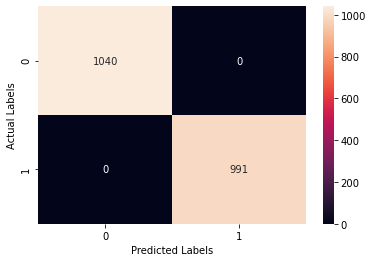

In [200]:
#from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred10),annot=True,fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

In [201]:
temp.append(['Random Forest',round(f1_score(y_test,y_pred10,average='macro'),5)])

### Performance Metric Comparison

In [206]:
performance_df = pd.DataFrame(temp, columns = ['Models', 'F1-Score'])

In [207]:
performance_df

,Models,F1-Score
0,Logistic Regression,0.95814
1,Decision Tree,1.00000
2,K-Nearest Neighbours,0.99704
3,Linear SVM,0.96553
4,Gradient Boosting,1.00000
5,XG Boosting,1.00000
6,Bernoulli Naive Bayes,0.86965
7,Gaussian Naive Bayes,0.92955
8,Multinomial Naive Bayes,0.79892
9,Random Forest,1.00000


* Models/Algorithms like Decision Tree, Random Forest, GB and XGB and KNN provides the best results on the dataset.

### Conclusion:
* The aim of the task at hand is to enable classification modeling which classify mushrooms as Edible or Poisonous.

1. Data Preprocessing
* The Mushroom Dataset was loaded from the csv file using Pandas into the python environment. All the relevant features were taken as per the attribute info for the analysis and model building.
* Possible data cleaning and pre-processing was carried out to clean-up the data from Missing Values and Nulls.
* EDA was initally performed on the dataset before one-hot encoding was applied to understand categorical distributions of features.
* Necessary pre-processing of data from object to numeric representation was done using Encoding.

2. Model Building
* General approach taken was to fit the model to the training data and transform it. Models like Naive Bayes Classifiers (Bernoulli, Multinomial and Gaussian NB), Logistic Regression, K-Nearest Neighbours, Decision Tree, RandomForest and Boosting Algorithms like Gradient Boosting and XGBoost were used (all without hyperparameter tuning).
* From a high-level, brief model training and testing, it was found that Models/Algorithms like Decision Tree, Random Forest, GB and XGB and KNN provides the best results on the dataset.
* Other classification models like Logistic Regression and Linear SVM also gives quite good scores on par.
* Models like Logistic Regression is computationally less expensive compared to Random Forest.
* The performane metrics listed in the above table as obtained for the models is not the best as all hyperparamters where not tried and tested and the entire model building process was just a basic to intermediate approach.

In [ ]:
#Submitted by Sujith Narayanan
#DSA_B3 - 2021 October Batch

<h2> <center> - END OF CASE STUDY -